In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re, os

In [2]:
plt.style.use('tableau-colorblind10')

In [3]:
projdir = os.getcwd()
datdir = projdir + "/data/results/default"
plotdir = projdir + "/figures"

In [4]:
if not os.path.exists(plotdir):
    os.makedirs(plotdir)
print("Will save plots to ",plotdir)

Will save plots to  /Users/aewsma/codes/tempthresholds/figures


In [5]:
panels = ["a.","b.","c.","d.","e.","f.","g.","h."]

In [6]:
dfT = pd.read_csv(datdir+"/temperature.csv")
dfS = pd.read_csv(datdir+"/gmslr.csv")
years = pd.Series([int(dfT.columns[i]) for i in range(len(dfT.columns))])

# transpose to match expected Pandas .loc for the reference period years
dfT = pd.DataFrame(np.transpose(np.array(dfT)))
dfS = pd.DataFrame(np.transpose(np.array(dfS)))

normalize relative to 1995-2014 mean (sea levels) and 1850-1900 mean (temperatures)

In [7]:
dfT = dfT - dfT.loc[(years>=1850) & (years<=1900)].mean(axis=0)
dfS = dfS - dfS.loc[(years>=1995) & (years<=2014)].mean(axis=0)

SLR in 2100, for comparison to previous studies' ensembles

In [8]:
np.percentile(np.array(dfS.loc[years==2100]), [5,50,95,100])

array([0.43947343, 0.83021495, 1.43535743, 2.84060761])

Get quantiles for plotted shaded regions

In [9]:
quantiles = np.array([0.025,0.05,0.17,0.25,0.50,0.75,0.83,0.95,0.975])
qT = dfT.quantile(quantiles, axis=1)
qS = dfS.quantile(quantiles, axis=1)

In [10]:
rcp_shading = {"RCP26" : ( 67/255, 147/255, 195/255),
               "RCP45" : (146/255, 197/255, 222/255),
               "RCP60" : (204/255, 174/255, 113/255),
               "RCP85" : (252/255, 209/255, 197/255)}
rcp_lines = {"RCP26" : (  0/255,  52/255, 102/255),
             "RCP45" : (112/255, 160/255, 205/255),
             "RCP60" : (196/255, 121/255,   0/255),
             "RCP85" : (153/255,   0/255,   2/255)}

# revised to match AR6 Figure 9.27:
rcp_lines_927 = {"RCP19" : ( 35/255, 197/255, 226/255),
                 "RCP26" : ( 21/255,  73/255, 135/255),
                 "RCP45" : (255/255, 150/255,  60/255),
                 "RCP70" : (255/255,  66/255,  48/255),
                 "RCP85" : (178/255,  44/255,  26/255),
                 "RCP85LC" : (200/255, 35/255, 200/255)}

## Comparisons to IPCC AR6

### Sea level

Ch 9, Table 9.9: 66% ranges (m relative to 1995-2014)

|  -      | SS1-1.9 | SSP1-2.6 | SSP2-4.5 | SSP3-7.0 | SSP5-8.5 | SSP5-8.5 LC |
|---------|---------|----------|----------|----------|----------|-------------|
| 2030    | 0.08-0.12 | 0.08-0.12 | 0.08-0.12 | 0.08-0.12 | 0.09-0.12 | 0.09-0.15 |
| 2050    | 0.15-0.23 | 0.16-0.25 | 0.17-0.26 | 0.18-0.27 | 0.20-0.29 | 0.20-0.40 |
| 2090    | 0.26-0.49 | 0.30-0.54 | 0.38-0.65 | 0.46-0.74 | 0.52-0.83 | 0.52-1.30 |
| 2100    | 0.28-0.55 | 0.32-0.62 | 0.44-0.76 | 0.55-0.90 | 0.63-1.01 | 0.63-1.60 |
| 2150    | 0.37-0.86 | 0.46-0.99 | 0.66-1.33 | 0.89-1.65 | 0.98-1.88 | 0.98-4.82 |


To 2100:

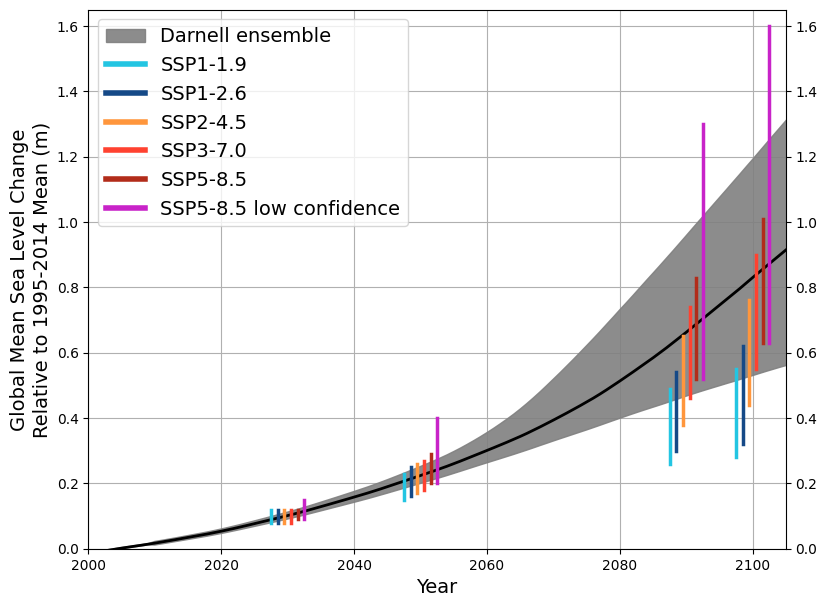

In [11]:
lwd = 2.5

fig,ax = plt.subplots(1,1,figsize=(9,7))
ax.fill_between(years[:311], np.array(qS.iloc[np.where(quantiles==0.17)])[0][:311], 
                np.array(qS.iloc[np.where(quantiles==0.83)])[0][:311], alpha=0.9, color="gray", label="Darnell ensemble")
ax.plot(years[:311],np.array(qS.iloc[np.where(quantiles==0.5)])[0][:311], linewidth=2, color="black")
ax.set_xlim([2000,2105]); ax.set_ylim([0,1.65]);
#2030
ax.plot([2027.5]*2, [0.08,0.12], color=rcp_lines_927["RCP19"], linewidth=lwd, label="SSP1-1.9")
ax.plot([2028.5]*2, [0.08,0.12], color=rcp_lines_927["RCP26"], linewidth=lwd, label="SSP1-2.6")
ax.plot([2029.5]*2, [0.08,0.12], color=rcp_lines_927["RCP45"], linewidth=lwd, label="SSP2-4.5")
ax.plot([2030.5]*2, [0.08,0.12], color=rcp_lines_927["RCP70"], linewidth=lwd, label="SSP3-7.0")
ax.plot([2031.5]*2, [0.09,0.12], color=rcp_lines_927["RCP85"], linewidth=lwd, label="SSP5-8.5")
ax.plot([2032.5]*2, [0.09,0.15], color=rcp_lines_927["RCP85LC"], linewidth=lwd, label="SSP5-8.5 low confidence")
#2050
ax.plot([2047.5]*2, [0.15,0.23], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2048.5]*2, [0.16,0.25], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2049.5]*2, [0.17,0.26], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2050.5]*2, [0.18,0.27], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2051.5]*2, [0.20,0.29], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2052.5]*2, [0.20,0.40], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2090
ax.plot([2087.5]*2, [0.26,0.49], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2088.5]*2, [0.30,0.54], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2089.5]*2, [0.38,0.65], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2090.5]*2, [0.46,0.74], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2091.5]*2, [0.52,0.83], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2092.5]*2, [0.52,1.30], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2100
ax.plot([2097.5]*2, [0.28,0.55], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2098.5]*2, [0.32,0.62], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2099.5]*2, [0.44,0.76], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2100.5]*2, [0.55,0.90], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2101.5]*2, [0.63,1.01], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2102.5]*2, [0.63,1.60], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2150
ax.plot([2147.5]*2, [0.37,0.86], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2148.5]*2, [0.46,0.99], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2149.5]*2, [0.66,1.33], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2150.5]*2, [0.89,1.65], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2151.5]*2, [0.98,1.88], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2152.5]*2, [0.98,4.82], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
leg = ax.legend(loc="upper left", fontsize=14);
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.tick_params(right=True, labelright=True)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/gmsl_projections_66p_2100_Darnell.pdf", bbox_inches='tight');

To 2150:

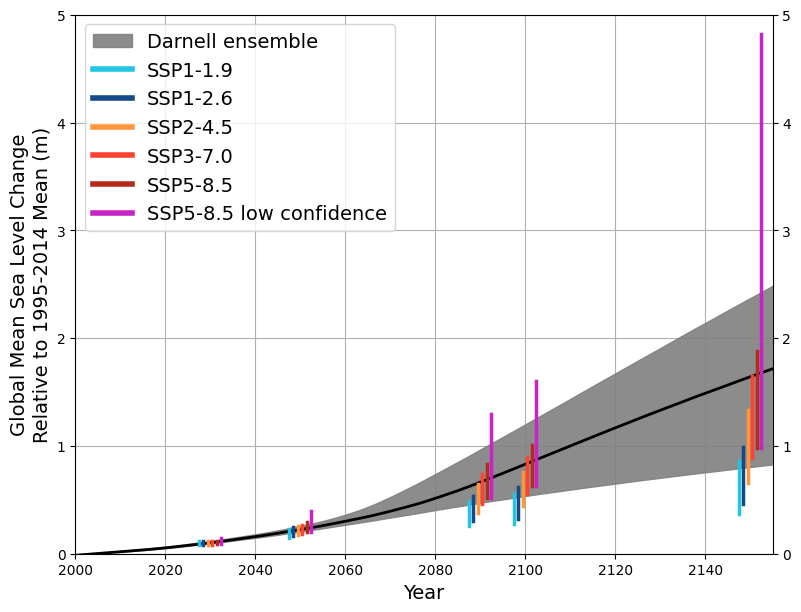

In [12]:
lwd = 2.5

fig,ax = plt.subplots(1,1,figsize=(9,7))
ax.fill_between(years[:311], np.array(qS.iloc[np.where(quantiles==0.17)])[0][:311], 
                np.array(qS.iloc[np.where(quantiles==0.83)])[0][:311], alpha=0.9, color="gray", label="Darnell ensemble")
ax.plot(years[:311],np.array(qS.iloc[np.where(quantiles==0.5)])[0][:311], linewidth=2, color="black")
ax.set_xlim([2000,2155]); ax.set_ylim([0,5]);
#2030
ax.plot([2027.5]*2, [0.08,0.12], color=rcp_lines_927["RCP19"], linewidth=lwd, label="SSP1-1.9")
ax.plot([2028.5]*2, [0.08,0.12], color=rcp_lines_927["RCP26"], linewidth=lwd, label="SSP1-2.6")
ax.plot([2029.5]*2, [0.08,0.12], color=rcp_lines_927["RCP45"], linewidth=lwd, label="SSP2-4.5")
ax.plot([2030.5]*2, [0.08,0.12], color=rcp_lines_927["RCP70"], linewidth=lwd, label="SSP3-7.0")
ax.plot([2031.5]*2, [0.09,0.12], color=rcp_lines_927["RCP85"], linewidth=lwd, label="SSP5-8.5")
ax.plot([2032.5]*2, [0.09,0.15], color=rcp_lines_927["RCP85LC"], linewidth=lwd, label="SSP5-8.5 low confidence")
#2050
ax.plot([2047.5]*2, [0.15,0.23], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2048.5]*2, [0.16,0.25], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2049.5]*2, [0.17,0.26], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2050.5]*2, [0.18,0.27], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2051.5]*2, [0.20,0.29], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2052.5]*2, [0.20,0.40], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2090
ax.plot([2087.5]*2, [0.26,0.49], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2088.5]*2, [0.30,0.54], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2089.5]*2, [0.38,0.65], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2090.5]*2, [0.46,0.74], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2091.5]*2, [0.52,0.83], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2092.5]*2, [0.52,1.30], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2100
ax.plot([2097.5]*2, [0.28,0.55], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2098.5]*2, [0.32,0.62], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2099.5]*2, [0.44,0.76], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2100.5]*2, [0.55,0.90], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2101.5]*2, [0.63,1.01], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2102.5]*2, [0.63,1.60], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
#2150
ax.plot([2147.5]*2, [0.37,0.86], color=rcp_lines_927["RCP19"], linewidth=lwd)
ax.plot([2148.5]*2, [0.46,0.99], color=rcp_lines_927["RCP26"], linewidth=lwd)
ax.plot([2149.5]*2, [0.66,1.33], color=rcp_lines_927["RCP45"], linewidth=lwd)
ax.plot([2150.5]*2, [0.89,1.65], color=rcp_lines_927["RCP70"], linewidth=lwd)
ax.plot([2151.5]*2, [0.98,1.88], color=rcp_lines_927["RCP85"], linewidth=lwd)
ax.plot([2152.5]*2, [0.98,4.82], color=rcp_lines_927["RCP85LC"], linewidth=lwd)
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Sea Level Change\nRelative to 1995-2014 Mean (m)",fontsize=14);
leg = ax.legend(loc="upper left", fontsize=14);
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.tick_params(right=True, labelright=True)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/gmsl_projections_66p_2150_Darnell.pdf", bbox_inches='tight');

### Temperatures

From [AR6 Summary for Policymakers](https://www.ipcc.ch/report/ar6/syr/downloads/report/IPCC_AR6_SYR_SPM.pdf) (B.1.1):

"The assessed climate response to GHG emissions scenarios results in a best estimate of warming for 2081–2100 that spans a range
from 1.4°C for a very low GHG emissions scenario (SSP1-1.9) to 2.7°C for an intermediate GHG emissions scenario
(SSP2-4.5) and 4.4°C for a very high GHG emissions scenario (SSP5-8.5)30, with narrower uncertainty ranges31 than for
corresponding scenarios in AR5. {Cross-Section Boxes 1 and 2, 3.1.1, 3.3.4, Table 3.1, 4.3} (Box SPM.1)"

"The best estimates [and very likely ranges] for the different scenarios are: 1.4 [1.0 to 1.8 ]°C (SSP1-1.9); 1.8 [1.3 to 2.4]°C (SSP1-2.6); 2.7 [2.1 to 3.5]°C (SSP2-4.5); 3.6 [2.8 to 4.6]°C (SSP3-7.0); and 4.4 [3.3 to 5.7 ]°C (SSP5-8.5). {3.1.1} (Box SPM.1)"

And Table SPM1 [here](https://www.ipcc.ch/report/ar6/wg1/downloads/report/IPCC_AR6_WGI_SPM.pdf)

(Temperatures are relative to IPCC "pre-industrial" period of 1850-1900)

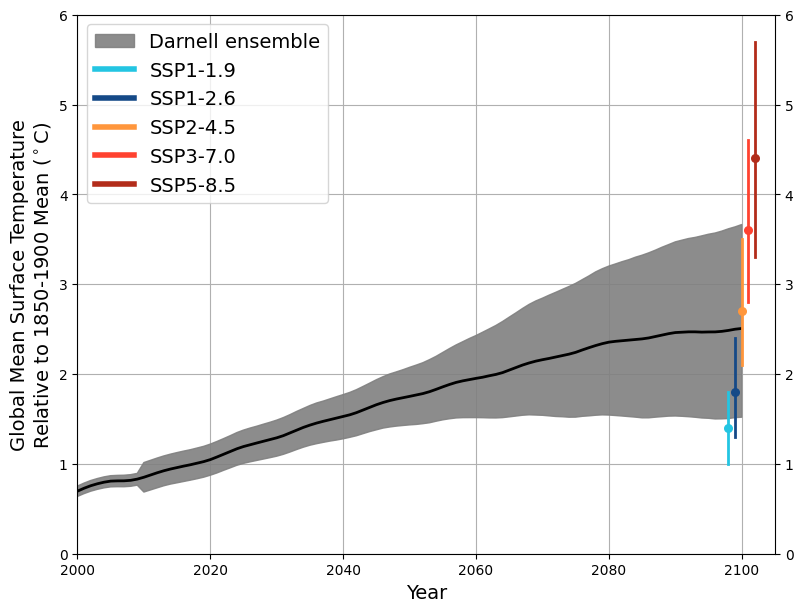

In [13]:
lwd = 2

fig,ax = plt.subplots(1,1,figsize=(9,7))
ax.fill_between(years[:251], np.array(qT.iloc[np.where(quantiles==0.05)])[0][:251], 
                np.array(qT.iloc[np.where(quantiles==0.95)])[0][:251], alpha=0.9, color="gray", label="Darnell ensemble")
ax.plot(years[:251],np.array(qT.iloc[np.where(quantiles==0.5)])[0][:251], linewidth=2, color="black")
ax.set_xlim([2000,2105]); ax.set_ylim([0,6]);
# 1-1.9
ax.plot([2098]*2, [1.0, 1.8], color=rcp_lines_927["RCP19"], linewidth=lwd, label="SSP1-1.9")
ax.scatter([2098],[1.4], s=30, color=rcp_lines_927["RCP19"])
# 1-2.6
ax.plot([2099]*2, [1.3, 2.4], color=rcp_lines_927["RCP26"], linewidth=lwd, label="SSP1-2.6")
ax.scatter([2099],[1.8], s=30, color=rcp_lines_927["RCP26"])
# 2-4.5
ax.plot([2100]*2, [2.1, 3.5], color=rcp_lines_927["RCP45"], linewidth=lwd, label="SSP2-4.5")
ax.scatter([2100],[2.7], s=30, color=rcp_lines_927["RCP45"])
# 3-7.0
ax.plot([2101]*2, [2.8, 4.6], color=rcp_lines_927["RCP70"], linewidth=lwd, label="SSP3-7.0")
ax.scatter([2101],[3.6], s=30, color=rcp_lines_927["RCP70"])
# 5-8.5
ax.plot([2102]*2, [3.3, 5.7], color=rcp_lines_927["RCP85"], linewidth=lwd, label="SSP5-8.5")
ax.scatter([2102],[4.4], s=30, color=rcp_lines_927["RCP85"])
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Surface Temperature\nRelative to 1850-1900 Mean ($^\circ$C)",fontsize=14);
leg = ax.legend(loc="upper left", fontsize=14);
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.tick_params(right=True, labelright=True)
plt.grid(); ax.set_axisbelow(True)
fig.savefig("./figures/temp_projections_90p_2100_Darnell.pdf", bbox_inches='tight');

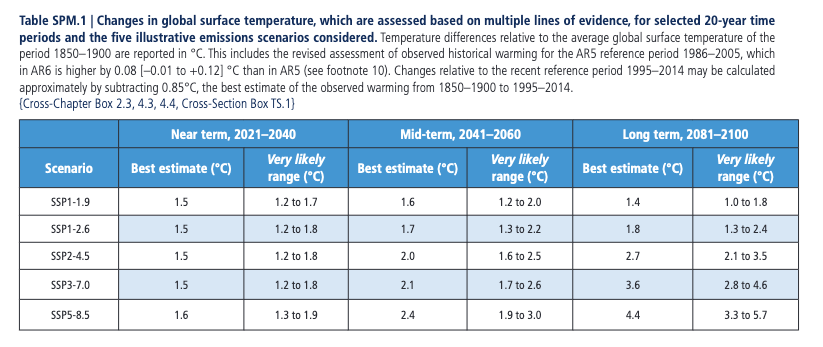

In [14]:
T_near = np.quantile(dfT.loc[(years>=2021) & (years<=2040)].mean(axis=0), [0.05, 0.95, 0.5])
T_mid  = np.quantile(dfT.loc[(years>=2041) & (years<=2060)].mean(axis=0), [0.05, 0.95, 0.5])
T_long = np.quantile(dfT.loc[(years>=2081) & (years<=2100)].mean(axis=0), [0.05, 0.95, 0.5])

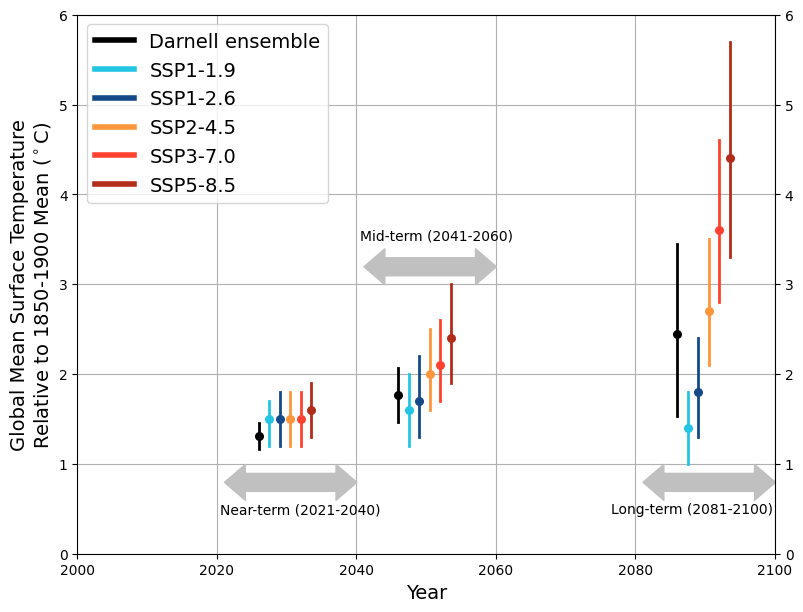

In [15]:
lwd = 2

fig,ax = plt.subplots(1,1,figsize=(9,7))
# NEAR
# Darnell
ax.plot([2026]*2, T_near[:2], color="black", linewidth=lwd, label="Darnell ensemble")
ax.scatter([2026],T_near[-1], s=30, color="black")
# 1-1.9
ax.plot([2027.5]*2, [1.2, 1.7], color=rcp_lines_927["RCP19"], linewidth=lwd, label="SSP1-1.9")
ax.scatter([2027.5],[1.5], s=30, color=rcp_lines_927["RCP19"])
# 1-2.6
ax.plot([2029]*2, [1.2, 1.8], color=rcp_lines_927["RCP26"], linewidth=lwd, label="SSP1-2.6")
ax.scatter([2029],[1.5], s=30, color=rcp_lines_927["RCP26"])
# 2-4.5
ax.plot([2030.5]*2, [1.2, 1.8], color=rcp_lines_927["RCP45"], linewidth=lwd, label="SSP2-4.5")
ax.scatter([2030.5],[1.5], s=30, color=rcp_lines_927["RCP45"])
# 3-7.0
ax.plot([2032]*2, [1.2, 1.8], color=rcp_lines_927["RCP70"], linewidth=lwd, label="SSP3-7.0")
ax.scatter([2032],[1.5], s=30, color=rcp_lines_927["RCP70"])
# 5-8.5
ax.plot([2033.5]*2, [1.3, 1.9], color=rcp_lines_927["RCP85"], linewidth=lwd, label="SSP5-8.5")
ax.scatter([2033.5],[1.6], s=30, color=rcp_lines_927["RCP85"])
# MID
# Darnell
ax.plot([2046]*2, T_mid[:2], color="black", linewidth=lwd); ax.scatter([2046],T_mid[-1], s=30, color="black")
# 1-1.9
ax.plot([2047.5]*2, [1.2, 2.0], color=rcp_lines_927["RCP19"], linewidth=lwd); ax.scatter([2047.5],[1.6], s=30, color=rcp_lines_927["RCP19"])
# 1-2.6
ax.plot([2049]*2, [1.3, 2.2], color=rcp_lines_927["RCP26"], linewidth=lwd); ax.scatter([2049],[1.7], s=30, color=rcp_lines_927["RCP26"])
# 2-4.5
ax.plot([2050.5]*2, [1.6, 2.5], color=rcp_lines_927["RCP45"], linewidth=lwd); ax.scatter([2050.5],[2.0], s=30, color=rcp_lines_927["RCP45"])
# 3-7.0
ax.plot([2052]*2, [1.7, 2.6], color=rcp_lines_927["RCP70"], linewidth=lwd); ax.scatter([2052],[2.1], s=30, color=rcp_lines_927["RCP70"])
# 5-8.5
ax.plot([2053.5]*2, [1.9, 3.0], color=rcp_lines_927["RCP85"], linewidth=lwd); ax.scatter([2053.5],[2.4], s=30, color=rcp_lines_927["RCP85"])
# LONG
# Darnell
ax.plot([2086]*2, T_long[:2], color="black", linewidth=lwd); ax.scatter([2086],T_long[-1], s=30, color="black")
# 1-1.9
ax.plot([2087.5]*2, [1.0, 1.8], color=rcp_lines_927["RCP19"], linewidth=lwd); ax.scatter([2087.5],[1.4], s=30, color=rcp_lines_927["RCP19"])
# 1-2.6
ax.plot([2089]*2, [1.3, 2.4], color=rcp_lines_927["RCP26"], linewidth=lwd); ax.scatter([2089],[1.8], s=30, color=rcp_lines_927["RCP26"])
# 2-4.5
ax.plot([2090.5]*2, [2.1, 3.5], color=rcp_lines_927["RCP45"], linewidth=lwd); ax.scatter([2090.5],[2.7], s=30, color=rcp_lines_927["RCP45"])
# 3-7.0
ax.plot([2092]*2, [2.8, 4.6], color=rcp_lines_927["RCP70"], linewidth=lwd); ax.scatter([2092],[3.6], s=30, color=rcp_lines_927["RCP70"])
# 5-8.5
ax.plot([2093.5]*2, [3.3, 5.7], color=rcp_lines_927["RCP85"], linewidth=lwd); ax.scatter([2093.5],[4.4], s=30, color=rcp_lines_927["RCP85"])
ax.set_xlim([2000,2100]); ax.set_ylim([0,6]);
plt.xlabel("Year",fontsize=14); plt.ylabel("Global Mean Surface Temperature\nRelative to 1850-1900 Mean ($^\circ$C)",fontsize=14);
leg = ax.legend(loc="upper left", fontsize=14);
for line in leg.get_lines():
    line.set_linewidth(4.0)
plt.tick_params(right=True, labelright=True)
plt.grid(); ax.set_axisbelow(True)
plt.fill_between([2021,2024,2024,2037,2037,2040], [0.8,0.6,0.7,0.7,0.6,0.8], [0.8,1,0.9,0.9,1,0.8], color="silver")
plt.text(2020.5, 0.45, "Near-term (2021-2040)")
plt.fill_between([2041,2044,2044,2057,2057,2060], [3.2,3,3.1,3.1,3,3.2], [3.2,3.4,3.3,3.3,3.4,3.2], color="silver")
plt.text(2040.5, 3.5, "Mid-term (2041-2060)")
plt.fill_between([2081,2084,2084,2097,2097,2100], [0.8,0.6,0.7,0.7,0.6,0.8], [0.8,1,0.9,0.9,1,0.8], color="silver")
plt.text(2076.5, 0.45, "Long-term (2081-2100)")
fig.savefig("./figures/temp_projections_90p_2100_Darnell.pdf", bbox_inches='tight');

Check on probability of exceeding 1.5m GMSL with GMST < 2 deg C

In [16]:
maxT = dfT.max()
maxS = dfS.max()

In [17]:
print("P(SLR > 1.5m | T < 2) = ", np.round(len(maxS.loc[(maxT <= 2) & (maxS >= 1.5)]) / len(maxS.loc[maxT <= 2]),4))

P(SLR > 1.5m | T < 2) =  0.0626


In [18]:
years

0      1850
1      1851
2      1852
3      1853
4      1854
       ... 
446    2296
447    2297
448    2298
449    2299
450    2300
Length: 451, dtype: int64